# Training a custom CNN: Task 2 (MIDAS@IIITD Internship/RA)
---

## Part 1. Training a custom Convolutional Neural Network

- Data Preprocessing
- Model
- Training 
- Saving Model Check points

In [1]:
import os 
import cv2
import glob 
from PIL import Image

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline    

import torch 
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
from skimage import io

/home/pratik/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


### 1.1. Data Preprocessing

In [2]:
df = pd.read_csv('data/labels.csv')
df.head()

,filenames,labels_code,labels
0,img001-001.png,img001,1
1,img001-002.png,img001,1
2,img001-003.png,img001,1
3,img001-004.png,img001,1
4,img001-007.png,img001,1


In [3]:
labels_dic = {
    'img001':'0','img002':'1','img003':'2','img004':'3','img005':'4','img006':'5','img007':'6','img008':'7',
    'img009':'8','img010':'9',
    
    'img011':'A','img012':'B','img013':'C','img014':'D','img015':'E','img016':'F',
    'img017':'G','img018':'H','img019':'I','img020':'J','img021':'K','img022':'L','img023':'M','img024':'N',
    'img025':'O','img026':'P','img027':'Q','img028':'R','img029':'S','img030':'T','img031':'U','img032':'V',
    'img033':'W','img034':'X','img035':'Y','img036':'Z',
    
    'img037':'a','img038':'b','img039':'c','img040':'d','img041':'e','img042':'f',
    'img043':'g','img044':'h','img045':'i','img046':'j','img047':'k','img048':'l','img049':'m','img050':'n',
    'img051':'o','img052':'p','img053':'q','img054':'r','img055':'s','img056':'t','img057':'u','img058':'v',
    'img059':'w','img060':'x','img061':'y','img062':'z'
}

In [4]:
df['label_values'] = df['labels_code'].map(labels_dic)
df.tail()

,filenames,labels_code,labels,label_values
2475,img062-048.png,img062,62,z
2476,img062-049.png,img062,62,z
2477,img062-050.png,img062,62,z
2478,img062-053.png,img062,62,z
2479,img062-055.png,img062,62,z


### Exploring images

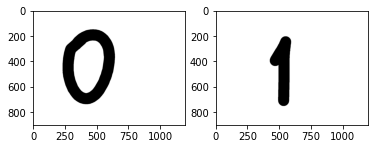

In [5]:
f, axarr = plt.subplots(1,2)

img_1 = Image.open('data/train/img001-001.png')
img_2 = Image.open('data/train/img002-002.png')

axarr[0].imshow(img_1)
axarr[1].imshow(img_2)